In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
cal = fetch_california_housing()

In [2]:
print(cal.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
cal_df = pd.DataFrame(cal.data, columns = cal.feature_names)
cal_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
cal_df['Price'] = cal.target
cal_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
print('보스톤 주택 가격 데이터셋 크기: ', cal_df.shape)

보스톤 주택 가격 데이터셋 크기:  (20640, 9)


In [6]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
#X, Y 분할하기
Y = cal_df['Price']
X = cal_df.drop(['Price'], axis = 1, inplace = False)

In [9]:
#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 156)

In [10]:
#선형 회귀 분석 : 모델 생성
lr = LinearRegression()

In [11]:
#선형 회귀 분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [12]:
#선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [13]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 0.543, RMSE : 0.737
R^2(Variance score) : 0.595


In [14]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값; ', np.round(lr.coef_, 1))

Y 절편 값:  -37.23905305294168
회귀 계수 값;  [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]


In [15]:
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

AveBedrms     0.60
MedInc        0.43
HouseAge      0.01
Population   -0.00
AveOccup     -0.01
AveRooms     -0.10
Latitude     -0.43
Longitude    -0.44
dtype: float64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

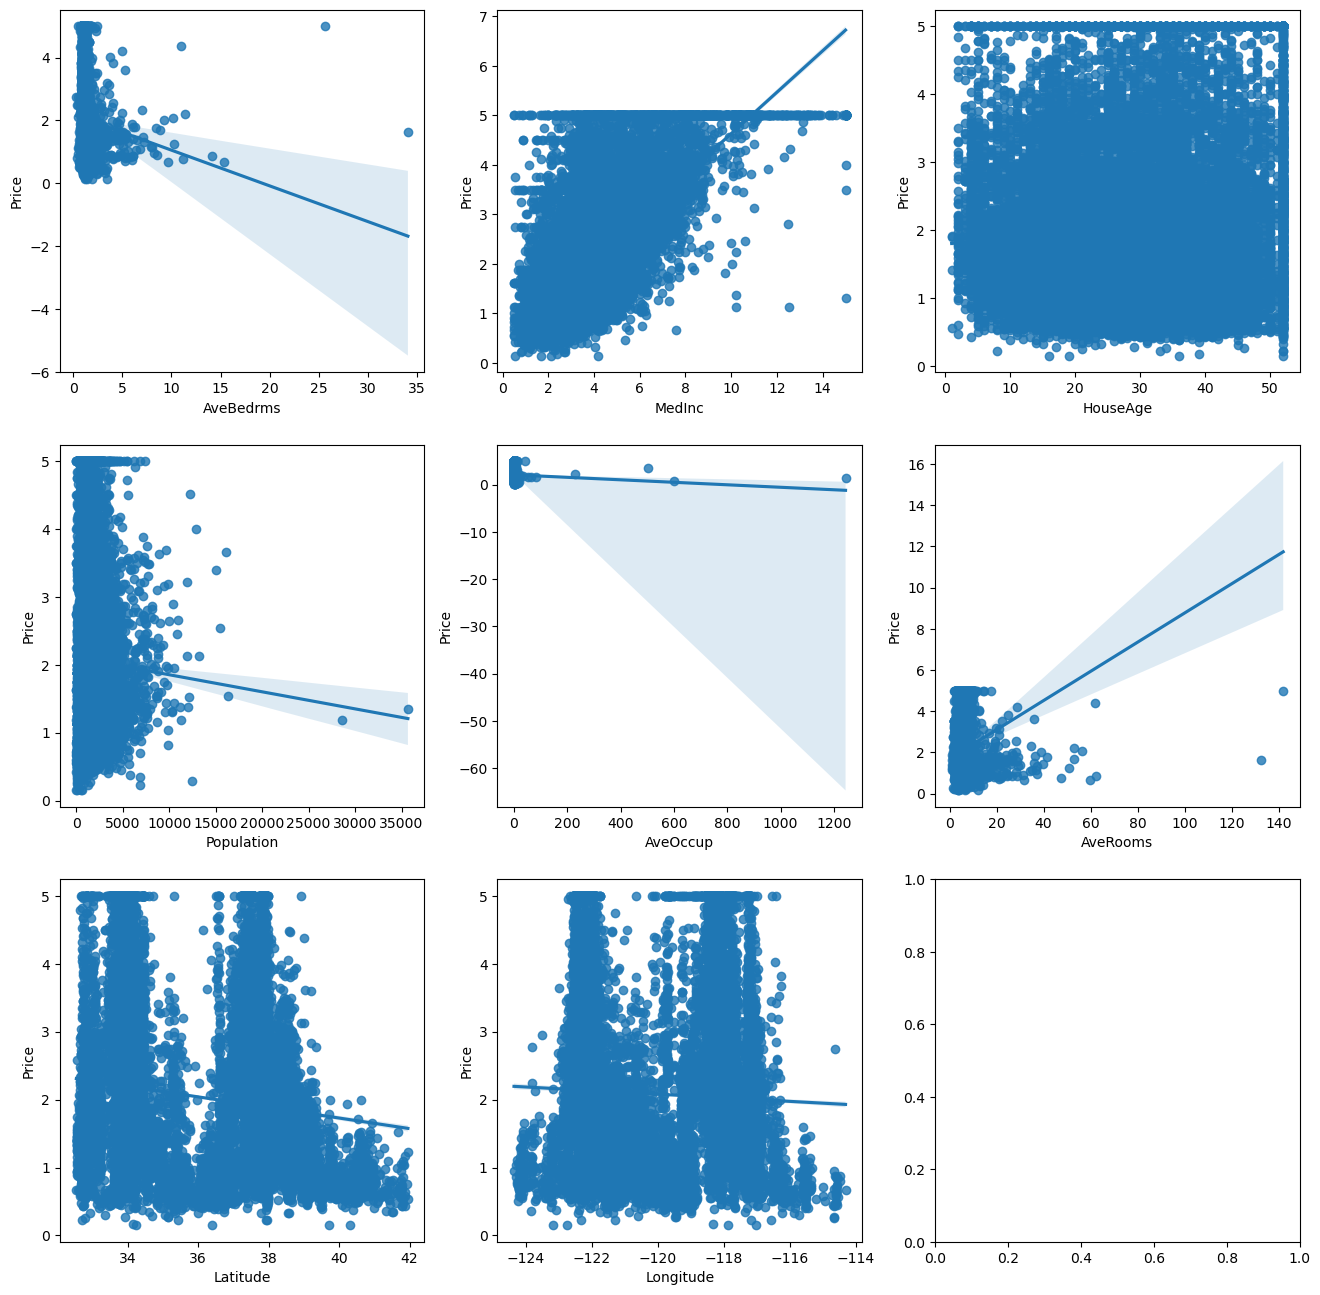

In [17]:
fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 3)

x_features = ['AveBedrms', 'MedInc', 'HouseAge', 'Population', 'AveOccup', 'AveRooms', 'Latitude', 'Longitude']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'Price', data = cal_df, ax = axs[row][col])